In [1]:
import numpy as np
import scipy.signal as signal
import math as m
import matplotlib.pyplot as plt
%matplotlib inline

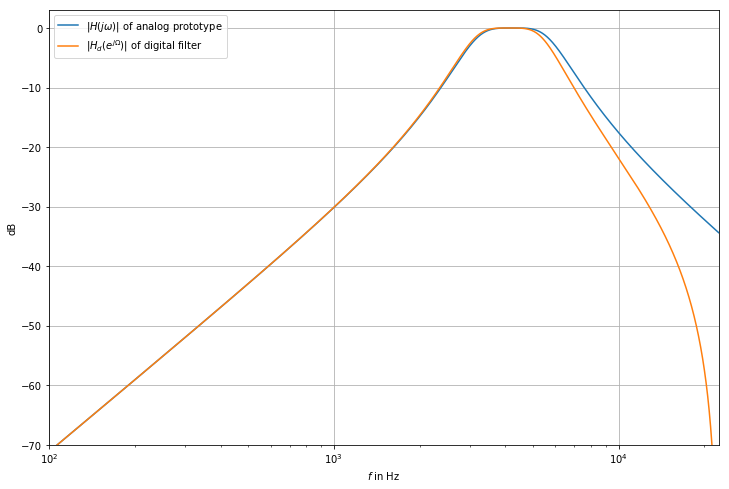

In [2]:
fc = 2*np.pi*np.array([3000, 6000])  # corner frequencies of bandpass
N = 2 #order
fs=45000 # sampling frequency

# design of analog filters with and without pre-warping
B, A = signal.butter(N, fc, btype='bandpass', analog=True)

# bilinear transform of analog 
b, a = signal.bilinear(B, A, fs)

# compute frequency responses
Om, Hd = signal.freqz(b, a, worN=1024)
tmp, H = signal.freqs(B, A, worN=fs*Om)

# plot results
np.seterr(divide='ignore')
f = Om*fs/(2*np.pi)
plt.figure(figsize=(12, 8))
plt.semilogx(f, 20*np.log10(np.abs(H)),
             label=r'$|H(j \omega)|$ of analog prototype')
plt.semilogx(f, 20*np.log10(np.abs(Hd)),
             label=r'$|H_d(e^{j \Omega})|$ of digital filter')
plt.xlabel(r'$f$ in Hz')
plt.ylabel(r'dB')
plt.axis([100, fs/2, -70, 3])
plt.legend()
plt.grid()